# Problem Statment: We need to Predict the custmores in the bank who will be exiting in future or not

In [137]:
# Part 1 - Data Preprocessing
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [138]:
dataset=pd.read_csv('/home/stellapps/Downloads/Churn_Modelling.csv')

# Data Preprocessing

In [139]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
dataset.info()   #No Null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


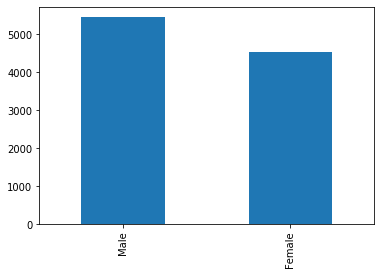

In [30]:
dataset['Gender'].value_counts().plot.bar()

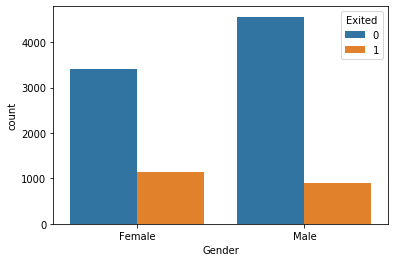

In [41]:
sns.countplot(data=dataset,x='Gender',hue='Exited')

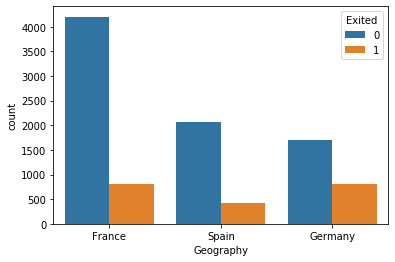

In [54]:
sns.countplot(data=dataset,hue='Exited',x='Geography')

In [11]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  11


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0


In [14]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 5


# Continous variables

In [21]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['CustomerId','RowNumber']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 4


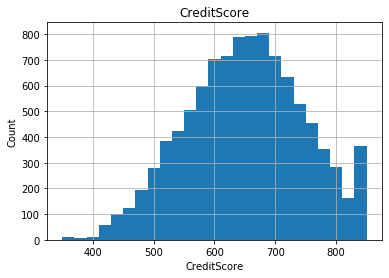

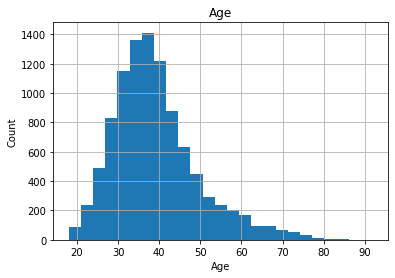

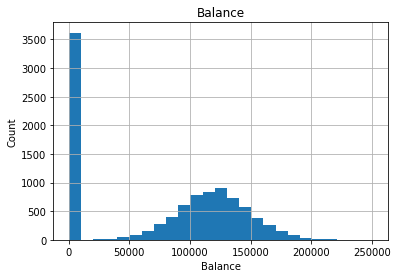

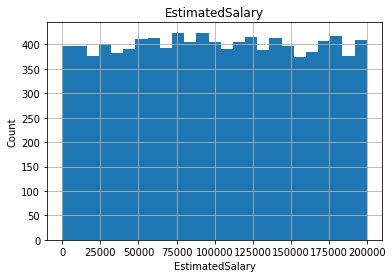

In [22]:
## Lets analyse the continuous values by creating histograms to understand the distribution
for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

# Outliers

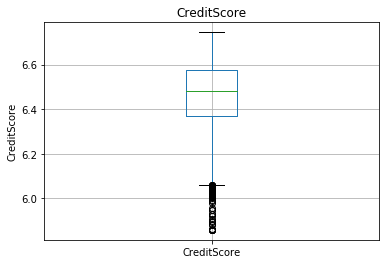

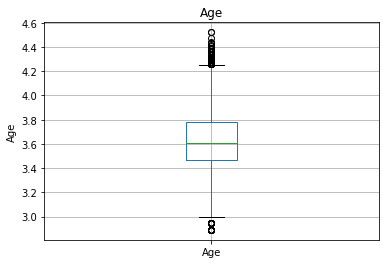

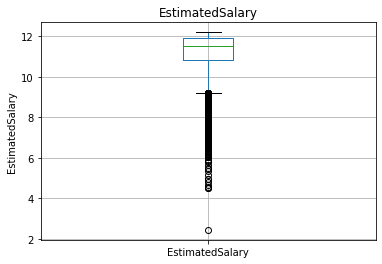

In [25]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()


In [31]:
dataset['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [33]:
dataset.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


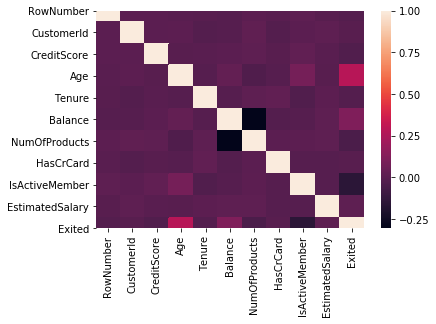

In [59]:
#Correlation
sns.heatmap(dataset.corr(),annot=None,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white')

In [140]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [141]:
#Handle Cat features
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)


In [142]:
## Concatenate the Data Frames
X=pd.concat([X,geography,gender],axis=1)
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [143]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling

In [144]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model Building using ANN

In [145]:
# Importing the Keras libraries and packages
import keras

#The Sequential model API is a way of creating deep learning models where an instance of the Sequential class is created  
#model layers are created and added to it and
from keras.models import Sequential

# A dense layer is a Layer in which Each Input Neuron is connected to the output Neuron
from keras.layers import Dense

#The purpose of an activation function is to add some kind of non-linear property to the function,
#withoot Activation function  network fails to perform mathamatical operation
from keras.layers import LeakyReLU,PReLU,ELU

# Dropout is a technique used to improve over-fit on neural networks, 
from keras.layers import Dropout

The Rectified Linear Unit or just simply ReLUhas become very popular in the last few years.
The activation is simply thresholded at zero: 
R(x) = max(0,x) i.e if x < 0 , R(x) = 0 and if x >= 0 , R(x) = x

 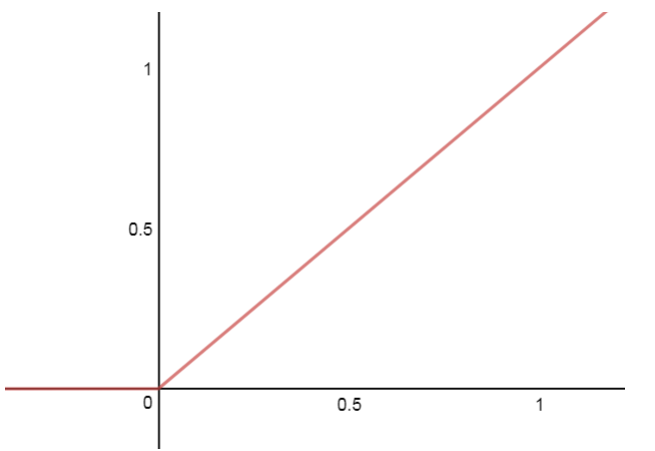
 
 1.RelU helps us to accelarates the convergence of gradiant decent towards global minima of loss function,
 compared with other Activation fucntions
 2.Other activation fucntions such as (tanh and signmode) take more time compute the operation ,but RelU takes very minimum time to compute Math operation,mean RelU is Faster than other activation function
 
The main drawback of RelU is  The gradients for negative input are zero, which means for activations in that region, the weights are not updated during backpropagation. This can create dead neurons that never get activated.


2.LeakyReLU:This is just updated version of RelU ,this function kills the some neuron these neurons never get activate in our neural network

The advantage of using leaky ReLU and replacing the horizontal line is that we avoid zero-gradients. Because in this case, we no longer have “dead” neurons that are always zero that cause our gradient to become zero.

In [146]:
# Initialising the ANN
classifier = Sequential()
#Adding first input layer and First hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu',input_dim = 11))
# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train,y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)

/home/stellapps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="he_uniform")`
  after removing the cwd from sys.path.
/home/stellapps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="he_uniform")`
  
/home/stellapps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`
  
/home/stellapps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if sys.path[0] == '':


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 3s 469us/step - loss: 0.5920 - accuracy: 0.7731 - val_loss: 0.5315 - val_accuracy: 0.7811
Epoch 2/100
5359/5359 [==============================] - 2s 311us/step - loss: 0.4900 - accuracy: 0.7957 - val_loss: 0.4866 - val_accuracy: 0.7955
Epoch 3/100
5359/5359 [==============================] - 2s 310us/step - loss: 0.4601 - accuracy: 0.8028 - val_loss: 0.4708 - val_accuracy: 0.7948
Epoch 4/100
5359/5359 [==============================] - 2s 316us/step - loss: 0.4475 - accuracy: 0.8069 - val_loss: 0.4620 - val_accuracy: 0.7955
Epoch 5/100
5359/5359 [==============================] - 2s 313us/step - loss: 0.4407 - accuracy: 0.8093 - val_loss: 0.4564 - val_accuracy: 0.7974
Epoch 6/100
5359/5359 [==============================] - 2s 322us/step - loss: 0.4355 - accuracy: 0.8097 - val_loss: 0.4521 - val_accuracy: 0.7982
Epoch 7/100
5359/5359 [==============================] - 2s 324us/step

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


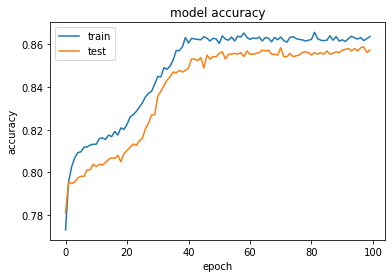

In [147]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


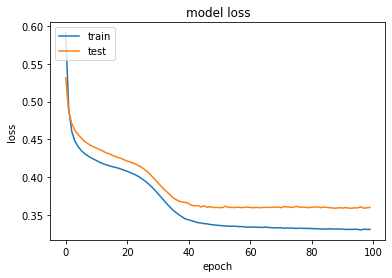

In [148]:

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [149]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)


In [150]:
cm

array([[1506,   89],
       [ 188,  217]])

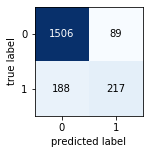

In [151]:
from mlxtend.plotting import plot_confusion_matrix
binary2 = np.array(cm)

fig, ax = plot_confusion_matrix(conf_mat=binary2, figsize=(2, 2))
plt.show()


In [152]:
score

0.8615

In [114]:
# Predicting a single new observation
"""Predict if the customer with the following informations will leave the bank:
Geography: France
Credit Score: 600
Gender: Male
Age: 40
Tenure: 3
Balance: 60000
Number of Products: 2
Has Credit Card: Yes
Is Active Member: Yes
Estimated Salary: 50000"""
new_prediction = classifier.predict(sc.transform(np.array([[0.0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))
new_prediction = (new_prediction > 0.5)


In [115]:
new_prediction 

array([[False]])

# Crossvalidation Method

In [116]:
import tensorflow.keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Keras Classifier expects one of its arguments as function, so we need to define that
# Function returns classifier with all its funciton (without fit)
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier 
    
#build new classifier to wrap and train with 10-fold
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 100)


# Return 10 ccuracies on 10 CV
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = 1)

mean = accuracies.mean()
variance = accuracies.std()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/100
7200/7200 [==============================] - 2s 296us/sample - loss: 0.5115 - acc: 0.7961
Epoch 2/100
7200/7200 [==============================] - 2s 224us/sample - loss: 0.4312 - acc: 0.7971
Epoch 3/100
7200/7200 [==============================] - 2s 230us/sample - loss: 0.4265 - acc: 0.7971
Epoch 4/100
7200/7200 [==============================] - 2s 241us/sample - loss: 0.4229 - acc: 0.7971
Epoch 5/100
7200/7200 [==============================] - 2s 318us/sample - loss: 0.4198 - acc: 0.8035
Epoch 6/100
7200/7200 [==============================] - 2s 266us/sample - loss: 0.4175 - acc: 0.8213
Epoch 7/100
7200/7200 [==============================] - 2s 228us/sample - loss: 0.4159 - acc: 0.8249
Epoch 8/100
7200/7200 [==============================] - 2s 222us/sample - loss: 0.4144 - acc: 0.8293
Epoch 9/100
7200/7200 [==============================] - 2s 210us/

Epoch 77/100
7200/7200 [==============================] - 2s 212us/sample - loss: 0.4008 - acc: 0.8361
Epoch 78/100
7200/7200 [==============================] - 2s 309us/sample - loss: 0.4003 - acc: 0.8356
Epoch 79/100
7200/7200 [==============================] - 1s 199us/sample - loss: 0.4006 - acc: 0.8365
Epoch 80/100
7200/7200 [==============================] - 2s 237us/sample - loss: 0.4003 - acc: 0.8356
Epoch 81/100
7200/7200 [==============================] - 1s 198us/sample - loss: 0.4002 - acc: 0.8349
Epoch 82/100
7200/7200 [==============================] - 2s 260us/sample - loss: 0.4006 - acc: 0.8347
Epoch 83/100
7200/7200 [==============================] - 2s 341us/sample - loss: 0.4005 - acc: 0.8361
Epoch 84/100
7200/7200 [==============================] - 2s 263us/sample - loss: 0.3999 - acc: 0.8365
Epoch 85/100
7200/7200 [==============================] - 2s 241us/sample - loss: 0.4007 - acc: 0.8349
Epoch 86/100
7200/7200 [==============================] - 2s 220us/sample

7200/7200 [==============================] - 2s 291us/sample - loss: 0.3530 - acc: 0.8526
Epoch 34/100
7200/7200 [==============================] - 2s 318us/sample - loss: 0.3517 - acc: 0.8560
Epoch 35/100
7200/7200 [==============================] - 2s 315us/sample - loss: 0.3515 - acc: 0.8572
Epoch 36/100
7200/7200 [==============================] - 2s 268us/sample - loss: 0.3494 - acc: 0.8581
Epoch 37/100
7200/7200 [==============================] - 2s 249us/sample - loss: 0.3508 - acc: 0.8583
Epoch 38/100
7200/7200 [==============================] - 2s 316us/sample - loss: 0.3498 - acc: 0.8572
Epoch 39/100
7200/7200 [==============================] - 2s 304us/sample - loss: 0.3496 - acc: 0.8558
Epoch 40/100
7200/7200 [==============================] - 2s 226us/sample - loss: 0.3480 - acc: 0.8589
Epoch 41/100
7200/7200 [==============================] - 2s 252us/sample - loss: 0.3490 - acc: 0.8537
Epoch 42/100
7200/7200 [==============================] - 2s 252us/sample - loss: 0.34

7200/7200 [==============================] - 2s 274us/sample - loss: 0.3973 - acc: 0.8350
Epoch 91/100
7200/7200 [==============================] - 2s 215us/sample - loss: 0.3970 - acc: 0.8353
Epoch 92/100
7200/7200 [==============================] - 2s 239us/sample - loss: 0.3972 - acc: 0.8338
Epoch 93/100
7200/7200 [==============================] - 2s 256us/sample - loss: 0.3974 - acc: 0.8351
Epoch 94/100
7200/7200 [==============================] - 2s 235us/sample - loss: 0.3971 - acc: 0.8365
Epoch 95/100
7200/7200 [==============================] - 2s 230us/sample - loss: 0.3973 - acc: 0.8368
Epoch 96/100
7200/7200 [==============================] - 2s 248us/sample - loss: 0.3976 - acc: 0.8339
Epoch 97/100
7200/7200 [==============================] - 2s 274us/sample - loss: 0.3969 - acc: 0.8347
Epoch 98/100
7200/7200 [==============================] - 2s 216us/sample - loss: 0.3972 - acc: 0.8349
Epoch 99/100
7200/7200 [==============================] - 1s 192us/sample - loss: 0.39

7200/7200 [==============================] - 1s 198us/sample - loss: 0.3412 - acc: 0.8593
Epoch 47/100
7200/7200 [==============================] - 1s 197us/sample - loss: 0.3405 - acc: 0.8611
Epoch 48/100
7200/7200 [==============================] - 1s 206us/sample - loss: 0.3408 - acc: 0.8592
Epoch 49/100
7200/7200 [==============================] - 1s 194us/sample - loss: 0.3409 - acc: 0.8586
Epoch 50/100
7200/7200 [==============================] - 2s 212us/sample - loss: 0.3403 - acc: 0.8590
Epoch 51/100
7200/7200 [==============================] - 2s 222us/sample - loss: 0.3400 - acc: 0.8611
Epoch 52/100
7200/7200 [==============================] - 2s 226us/sample - loss: 0.3396 - acc: 0.8617
Epoch 53/100
7200/7200 [==============================] - 2s 247us/sample - loss: 0.3394 - acc: 0.8606
Epoch 54/100
7200/7200 [==============================] - 2s 219us/sample - loss: 0.3402 - acc: 0.8619
Epoch 55/100
7200/7200 [==============================] - 1s 200us/sample - loss: 0.33

7200/7200 [==============================] - 2s 215us/sample - loss: 0.4216 - acc: 0.8090
Epoch 3/100
7200/7200 [==============================] - 2s 212us/sample - loss: 0.4130 - acc: 0.8272
Epoch 4/100
7200/7200 [==============================] - 2s 212us/sample - loss: 0.4079 - acc: 0.8318
Epoch 5/100
7200/7200 [==============================] - 2s 214us/sample - loss: 0.4042 - acc: 0.8317
Epoch 6/100
7200/7200 [==============================] - 2s 215us/sample - loss: 0.4027 - acc: 0.8342
Epoch 7/100
7200/7200 [==============================] - 2s 225us/sample - loss: 0.4016 - acc: 0.8343
Epoch 8/100
7200/7200 [==============================] - 2s 213us/sample - loss: 0.4006 - acc: 0.8340
Epoch 9/100
7200/7200 [==============================] - 2s 212us/sample - loss: 0.3998 - acc: 0.8374
Epoch 10/100
7200/7200 [==============================] - 2s 212us/sample - loss: 0.3986 - acc: 0.8356
Epoch 11/100
7200/7200 [==============================] - 2s 213us/sample - loss: 0.3980 - ac

7200/7200 [==============================] - 1s 206us/sample - loss: 0.3977 - acc: 0.8367
Epoch 60/100
7200/7200 [==============================] - 1s 207us/sample - loss: 0.3972 - acc: 0.8351
Epoch 61/100
7200/7200 [==============================] - 2s 212us/sample - loss: 0.3979 - acc: 0.8383
Epoch 62/100
7200/7200 [==============================] - 2s 209us/sample - loss: 0.3976 - acc: 0.8375
Epoch 63/100
7200/7200 [==============================] - 2s 233us/sample - loss: 0.3976 - acc: 0.8367
Epoch 64/100
7200/7200 [==============================] - 2s 229us/sample - loss: 0.3974 - acc: 0.8361
Epoch 65/100
7200/7200 [==============================] - 2s 215us/sample - loss: 0.3975 - acc: 0.8392
Epoch 66/100
7200/7200 [==============================] - 2s 212us/sample - loss: 0.3969 - acc: 0.8361
Epoch 67/100
7200/7200 [==============================] - 2s 209us/sample - loss: 0.3972 - acc: 0.8375
Epoch 68/100
7200/7200 [==============================] - 1s 206us/sample - loss: 0.39

In [117]:
mean

0.8447499930858612

In [118]:
variance

0.01747140807878158